In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [2]:
#iris data set
iris =datasets.load_iris()

In [3]:
# Divide the data and target in the Iris datasets by the variables X,y.
X = iris.data
y = iris.target

In [4]:
# Set the dataframe
dfx = pd.DataFrame(X, columns = iris.feature_names)
x = [[i] for i in dfx['sepal width (cm)']] # 꽃받침 넓이
x = np.array(x)

In [5]:
# 0: setosa, 1: versicolor, 2: virginica
y = [1 if i ==1 else 0 for i in iris.target] # versicolor는 1, 나머지 꽃은 0
y = np.array(y)

In [6]:
#logistic regression
log_reg=LogisticRegression(solver='lbfgs')
log_reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
# 꽃받침 넓이 데이터와 versicolor 간의 상관관계
log_reg.score(x,y)

0.7266666666666667

In [8]:
# logisitc 함수 구간 정의
x_predict = np.linspace(1.5,5,300).reshape(-1,1)
y_proba = log_reg.predict(x_predict)

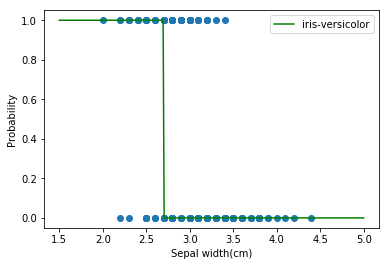

In [20]:
plt.plot(x,y,'o')
plt.plot(x_predict,y_proba,"g-", label = 'iris-versicolor')
plt.xlabel('Sepal width(cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

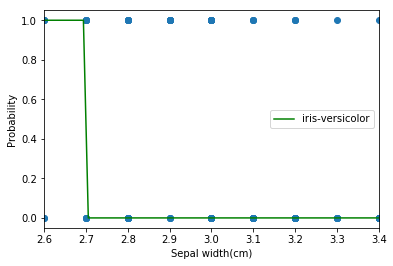

In [21]:
plt.xlim(2.6,3.4)
plt.plot(x,y,'o')
plt.plot(x_predict,y_proba,"g-", label = 'iris-versicolor')
plt.xlabel('Sepal width(cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

Versicolor의 꽃받침 너비는 1.9~3.4 cm에 분포하고, 다른 꽃들은 꽃받침의 너비가 2.2~ 4.5 cm까지 분포한다. 그래서 versicolor 꽃받침과 다른 꽃들의 꽃받침 너비가 중첩되는 구간이 생긴다.
임의의 꽃(setosa와 versicolor, virginica 중)의 꽃받침 너비가 2.7 cm 이상이면 위의 regression으로 임의의 꽃이 versicolor인지 아닌지 구분하기 힘들고, 꽃받침이 2.7 cm 미만에 해당하는 임의의 꽃이 versicolor임을 위의 regression으로 확인 할 수 있다.